In [54]:
import pandas as pd
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [55]:
data = pd.read_csv('german.data-numeric.csv',header=-1,sep='\\s+')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [56]:
len(data)

1000

In [57]:
train_target = data[24]
train_data = data.iloc[:,0:24]

In [58]:

clf = tree.DecisionTreeClassifier(random_state = 1)
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

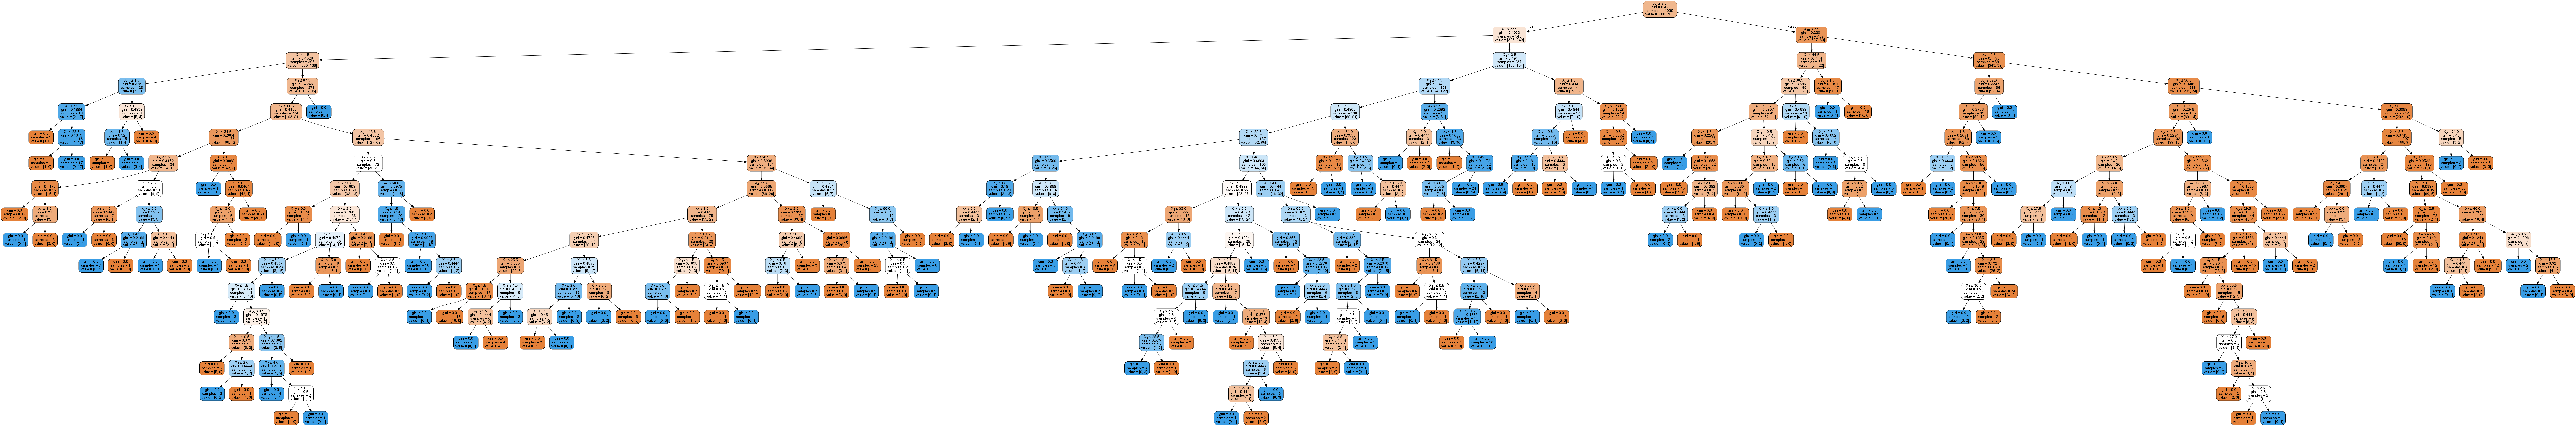

In [59]:
dot_data = tree.export_graphviz(clf, out_file="tree.out",
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png())

Переход от коричневого к синему - это шкала оценки клиента(Good(1) -> Bad(0))


Каждая характеристика может сделать цвет теплее или холоднее, набрав достатоточное количество отрицательных(положительных) характеристик человек переёдет в класс 0(1)

По узлам можно понять, что молодым людям не стоит выдавать кредит, и тем, кто часто переезжает не доверяют.

графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева